## Training the model using cleaned_demographics.csv dataset

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [159]:
df=pd.read_csv('../Stats Dataset Cleaned/cleaned_demographics.csv')
df.head()

,Year,Territory of asylum or residence,Location Name,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,M: Total
0,2001,Afghanistan,Kabul,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
1,2001,Afghanistan,Various,14335.0,0.0,0.0,99880.0,19234.0,412004.0,590904.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,625720.0
2,2001,Afghanistan,Herat,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2001,Angola,Viana,484.0,0.0,0.0,1282.0,43.0,0.0,3496.0,597.0,0.0,1645.0,787.0,34.0,0.0,3063.0
4,2001,Angola,Moxico,219.0,0.0,0.0,427.0,25.0,0.0,1405.0,226.0,0.0,711.0,139.0,15.0,0.0,1091.0


In [160]:
### dropping the unecessary columns which are not numeric

df.drop(columns=['Year', 'Territory of asylum or residence', 'Location Name'], axis=1, inplace=True)

In [161]:
df.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,M: Total
0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,590904.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,625720.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,3496.0,597.0,0.0,1645.0,787.0,34.0,0.0,3063.0
4,219.0,0.0,0.0,427.0,25.0,0.0,1405.0,226.0,0.0,711.0,139.0,15.0,0.0,1091.0


In [162]:
df.columns

Index(['Female 0-4', 'Female 5-11', 'Female 12-17', 'Female 18-59',
       'Female 60+', 'F: Unknown', 'F: Total', 'Male 0-4', 'Male 5-11',
       'Male 5-17', 'Male 18-59', 'Male 60+', 'M: Unknown', 'M: Total'],
      dtype='object')

In [163]:
### combining the total male and female population into one single output feature

df['Total Population'] = pd.to_numeric(df['F: Total'], errors='coerce') + pd.to_numeric(df['M: Total'], errors='coerce')


In [164]:
df.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,F: Total,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,M: Total,Total Population
0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,590904.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,625720.0,1216624.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,3496.0,597.0,0.0,1645.0,787.0,34.0,0.0,3063.0,6559.0
4,219.0,0.0,0.0,427.0,25.0,0.0,1405.0,226.0,0.0,711.0,139.0,15.0,0.0,1091.0,2496.0


In [165]:
df.drop(columns=['F: Total', 'M: Total'], axis=1, inplace=True)
df.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown,Total Population
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0,1216624.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,597.0,0.0,1645.0,787.0,34.0,0.0,6559.0
4,219.0,0.0,0.0,427.0,25.0,0.0,226.0,0.0,711.0,139.0,15.0,0.0,2496.0


### Now we have a dataset with only numeric features. Now we split the features into independent and dependent features as x and y respectively. 

In [166]:
x=df.drop('Total Population', axis=1)
y=df['Total Population']

In [167]:
x.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,14335.0,0.0,0.0,99880.0,19234.0,412004.0,14716.0,0.0,47522.0,114965.0,13025.0,435492.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,484.0,0.0,0.0,1282.0,43.0,0.0,597.0,0.0,1645.0,787.0,34.0,0.0
4,219.0,0.0,0.0,427.0,25.0,0.0,226.0,0.0,711.0,139.0,15.0,0.0


In [168]:
y.head()

0          4.0
1    1216624.0
2          2.0
3       6559.0
4       2496.0
Name: Total Population, dtype: float64

### Train Test Split

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [171]:
x_train.shape, x_test.shape

((12848, 12), (5507, 12))

In [172]:
x_train.shape, x_test.shape

((12848, 12), (5507, 12))

In [173]:
x_train.columns

Index(['Female 0-4', 'Female 5-11', 'Female 12-17', 'Female 18-59',
       'Female 60+', 'F: Unknown', 'Male 0-4', 'Male 5-11', 'Male 5-17',
       'Male 18-59', 'Male 60+', 'M: Unknown'],
      dtype='object')

In [207]:
x_test.head()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown
10209,0.0,3.0,2.0,7.0,0.0,0.0,1.0,2.0,44.0,13.0,0.0,0.0
17345,102.0,54.0,35.0,116.0,5.0,0.0,97.0,64.0,44.0,178.0,10.0,0.0
13461,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,44.0,1.0,0.0,0.0
7018,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,44.0,0.0,0.0,0.0
2475,296.0,0.0,0.0,3124.0,371.0,0.0,333.0,0.0,2749.0,3424.0,304.0,0.0


In [200]:
x_test.tail()

,Female 0-4,Female 5-11,Female 12-17,Female 18-59,Female 60+,F: Unknown,Male 0-4,Male 5-11,Male 5-17,Male 18-59,Male 60+,M: Unknown
2694,22.0,0.0,0.0,111.0,5.0,0.0,18.0,0.0,77.0,132.0,2.0,0.0
11465,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,44.0,5.0,0.0,0.0
3015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
17200,11.0,34.0,22.0,64.0,6.0,0.0,13.0,55.0,44.0,33.0,12.0,0.0
7896,2.0,5.0,2.0,21.0,0.0,0.0,3.0,7.0,44.0,48.0,0.0,0.0


In [208]:
y_test.head()

10209       29.0
17345      704.0
13461        2.0
7018         3.0
2475     13279.0
Name: Total Population, dtype: float64

In [201]:
y_test.tail()

2694     466.0
11465      8.0
3015       3.0
17200    266.0
7896      90.0
Name: Total Population, dtype: float64

### Standardizing the data using standardscaler

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
scaler = StandardScaler()

In [176]:
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Text(0.5, 1.0, 'x_train after scaling')

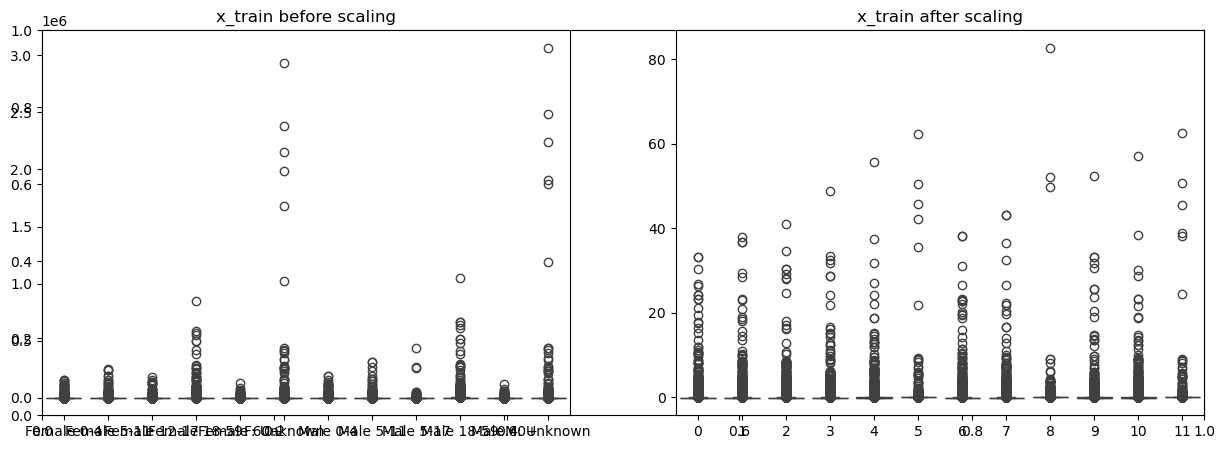

In [177]:
### boxplots to understand effect of standard scaler

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scaling')

Text(0.5, 1.0, 'x_train after scaling')

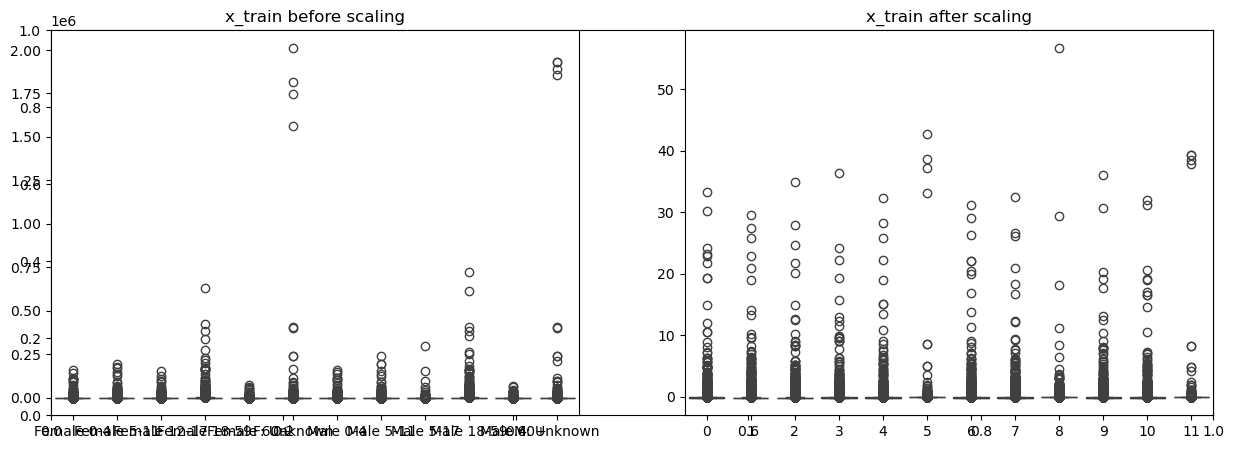

In [178]:
### boxplots to understand effect of standard scaler

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_test)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_test_scaled)
plt.title('x_train after scaling')

### Doing the regression

In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
regression=LinearRegression()

In [181]:
regression.fit(x_train_scaled,y_train)
y_predicted = regression.predict(x_test_scaled)

In [182]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [183]:
accuracy = r2_score(y_test, y_predicted)
mae=mean_absolute_error(y_test, y_predicted)
mse=mean_squared_error(y_test, y_predicted)
print(accuracy)
print(mae)
print(mse)

0.9999748003359833
142.36504661991393
503909.57477386


In [184]:
import pickle

In [185]:
with open('demographics.pkl', 'wb') as file:
    pickle.dump(regression, file)

In [186]:
# Load the model from the file
with open('demographics.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Create your test data
test_data = {
    'Female 0-4': [102.0],
    'Female 5-11': [54.0],
    'Female 12-17': [35.0],
    'Female 18-59': [116.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [97.0],
    'Male 5-11': [64.0],
    'Male 5-17': [44.0],
    'Male 18-59': [178.0],
    'Male 60+': [10.0],
    'M: Unknown': [0.0]
}

# Create DataFrame
test_df = pd.DataFrame(test_data)

# Standardize the test data using the same scaler used for training
x_data_1_model_testing_after_training = scaler.transform(test_df)  # Ensure 'scaler' is the same as used for training

# Make predictions
predictions = loaded_model.predict(x_data_1_model_testing_after_training)

# Display the predicted value
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 711.8873750806688


In [187]:
# Load the model from the file
with open('demographics.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Create your test data
test_data = {
    'Female 0-4': [0.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [3124.0],
    'Female 60+': [371.0],
    'F: Unknown': [0.0],
    'Male 0-4': [333.0],
    'Male 5-11': [0.0],
    'Male 5-17': [2749.0],
    'Male 18-59': [3424.0],
    'Male 60+': [304.0],
    'M: Unknown': [0.0]
}

# Create DataFrame
test_df = pd.DataFrame(test_data)

# Standardize the test data using the same scaler used for training
x_data_2_model_testing_after_training = scaler.transform(test_df)  # Ensure 'scaler' is the same as used for training

# Make predictions
predictions = loaded_model.predict(x_data_2_model_testing_after_training)

# Display the predicted value
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 12770.35983626004


### Decission Tree Regression

In [190]:
from sklearn.tree import DecisionTreeRegressor

# Initializing and training the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train_scaled, y_train)

# Making predictions
dt_predictions = dt_model.predict(x_test_scaled)

# Evaluating the model
dt_mae=mean_absolute_error(y_test,dt_predictions)
dt_accuracy=r2_score(y_test,dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(dt_accuracy)
print(dt_mae)
print(dt_mse)


0.9387697677307991
1609.3595808358598
1224401257.317095


In [191]:
with open('demographics_decission_tree.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

In [199]:
# Load the model from the file
with open('demographics_decission_tree.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Create your test data
test_data = {
    'Female 0-4': [102.0],
    'Female 5-11': [54.0],
    'Female 12-17': [35.0],
    'Female 18-59': [116.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [97.0],
    'Male 5-11': [64.0],
    'Male 5-17': [44.0],
    'Male 18-59': [178.0],
    'Male 60+': [10.0],
    'M: Unknown': [0.0]
}

# Create DataFrame
test_df = pd.DataFrame(test_data)

# Standardize the test data using the same scaler used for training
x_data_1_model_testing_after_training = scaler.transform(test_df)  # Ensure 'scaler' is the same as used for training

# Make predictions
predictions = loaded_model.predict(x_data_1_model_testing_after_training)

# Display the predicted value
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 725.0


In [198]:
# Load the model from the file
with open('demographics_decission_tree.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Create your test data
test_data = {
    'Female 0-4': [296.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [3124.0],
    'Female 60+': [371.0],
    'F: Unknown': [0.0],
    'Male 0-4': [333.0],
    'Male 5-11': [0.0],
    'Male 5-17': [2749.0],
    'Male 18-59': [3424.0],
    'Male 60+': [304.0],
    'M: Unknown': [0.0]
}

# Create DataFrame
test_df = pd.DataFrame(test_data)

# Standardize the test data using the same scaler used for training
x_data_2_model_testing_after_training = scaler.transform(test_df)  # Ensure 'scaler' is the same as used for training

# Make predictions
predictions = loaded_model.predict(x_data_2_model_testing_after_training)

# Display the predicted value
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 13271.0


In [202]:
# Load the model from the file
with open('demographics_decission_tree.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Create your test data
test_data = {
    'Female 0-4': [22.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [111.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [18.0],
    'Male 5-11': [0.0],
    'Male 5-17': [77.0],
    'Male 18-59': [132.0],
    'Male 60+': [2.0],
    'M: Unknown': [0.0]
}

# Create DataFrame
test_df = pd.DataFrame(test_data)

# Standardize the test data using the same scaler used for training
x_data_2_model_testing_after_training = scaler.transform(test_df)  # Ensure 'scaler' is the same as used for training

# Make predictions
predictions = loaded_model.predict(x_data_2_model_testing_after_training)

# Display the predicted value
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 486.0


### Random Forest Regression

In [205]:
from sklearn.ensemble import RandomForestRegressor

# Initializing and training the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train_scaled, y_train)

# Making predictions
rf_predictions = rf_model.predict(x_test_scaled)

# Evaluating the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae= mean_absolute_error(y_test,rf_predictions)
rf_accuracy=r2_score(y_test,rf_predictions)
print(rf_accuracy)
print(rf_mae)
print(rf_mse)


0.9850746353948879
1143.8511882959729
298457714.6150648


In [206]:
with open('demographics_random_forest.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [213]:
# Load the model from the file
with open('demographics_random_forest.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Create your test data
test_data = {
    'Female 0-4': [102.0],
    'Female 5-11': [54.0],
    'Female 12-17': [35.0],
    'Female 18-59': [116.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [97.0],
    'Male 5-11': [64.0],
    'Male 5-17': [44.0],
    'Male 18-59': [178.0],
    'Male 60+': [10.0],
    'M: Unknown': [0.0]
}

# Create DataFrame
test_df = pd.DataFrame(test_data)

# Standardize the test data using the same scaler used for training
x_data_1_model_testing_after_training = scaler.transform(test_df)  # Ensure 'scaler' is the same as used for training

# Make predictions
predictions = loaded_model.predict(x_data_1_model_testing_after_training)

# Display the predicted value
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 722.3


In [214]:
# Load the model from the file
with open('demographics_random_forest.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Create your test data
test_data = {
    'Female 0-4': [296.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [3124.0],
    'Female 60+': [371.0],
    'F: Unknown': [0.0],
    'Male 0-4': [333.0],
    'Male 5-11': [0.0],
    'Male 5-17': [2749.0],
    'Male 18-59': [3424.0],
    'Male 60+': [304.0],
    'M: Unknown': [0.0]
}

# Create DataFrame
test_df = pd.DataFrame(test_data)

# Standardize the test data using the same scaler used for training
x_data_2_model_testing_after_training = scaler.transform(test_df)  # Ensure 'scaler' is the same as used for training

# Make predictions
predictions = loaded_model.predict(x_data_2_model_testing_after_training)

# Display the predicted value
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 13141.53


### XGBoost Regression

In [211]:
import xgboost as xgb

# Initializing and training the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(x_train_scaled, y_train)

# Making predictions
xgb_predictions = xgb_model.predict(x_test_scaled)

# Evaluating the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae=mean_absolute_error(y_test,xgb_predictions)
xgb_accuracy = r2_score(y_test,xgb_predictions)
print(xgb_accuracy)
print(xgb_mae)
print(xgb_mse)


0.9551883345193266
1721.7499018368324
896084458.9937682


In [212]:
with open('demographics_xgboost.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [215]:
# Load the model from the file
with open('demographics_xgboost.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Create your test data
test_data = {
    'Female 0-4': [102.0],
    'Female 5-11': [54.0],
    'Female 12-17': [35.0],
    'Female 18-59': [116.0],
    'Female 60+': [5.0],
    'F: Unknown': [0.0],
    'Male 0-4': [97.0],
    'Male 5-11': [64.0],
    'Male 5-17': [44.0],
    'Male 18-59': [178.0],
    'Male 60+': [10.0],
    'M: Unknown': [0.0]
}

# Create DataFrame
test_df = pd.DataFrame(test_data)

# Standardize the test data using the same scaler used for training
x_data_1_model_testing_after_training = scaler.transform(test_df)  # Ensure 'scaler' is the same as used for training

# Make predictions
predictions = loaded_model.predict(x_data_1_model_testing_after_training)

# Display the predicted value
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 722.3


In [216]:
# Load the model from the file
with open('demographics_xgboost.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Create your test data
test_data = {
    'Female 0-4': [296.0],
    'Female 5-11': [0.0],
    'Female 12-17': [0.0],
    'Female 18-59': [3124.0],
    'Female 60+': [371.0],
    'F: Unknown': [0.0],
    'Male 0-4': [333.0],
    'Male 5-11': [0.0],
    'Male 5-17': [2749.0],
    'Male 18-59': [3424.0],
    'Male 60+': [304.0],
    'M: Unknown': [0.0]
}

# Create DataFrame
test_df = pd.DataFrame(test_data)

# Standardize the test data using the same scaler used for training
x_data_2_model_testing_after_training = scaler.transform(test_df)  # Ensure 'scaler' is the same as used for training

# Make predictions
predictions = loaded_model.predict(x_data_2_model_testing_after_training)

# Display the predicted value
print(f"Predicted Value: {predictions[0]}")


Predicted Value: 13141.53
